# **Lab 1: Bisection Method**<br>

The bisection method (also known as the binary search method) is a method of finding roots of a non-linear function. The assumption here is that the function is real continuous, otherwise the bisection method will not work. It is based on the **Intermediate Value Theorem** which states that if $f(x)$ is a real continuous function, and if $f(x_l)f(x_u)< 0$ then there must be a root between $x_l$ and $x_u$.

In today's lab, we will be implementing the bisection method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3-2x^2+4$,
<br>
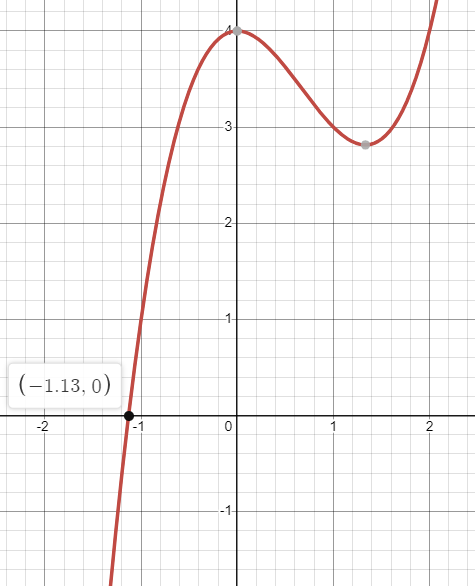
<br>
then in python we will create an array as follows:


In [ ]:
import numpy as np

f = np.array([1, -2, 0, 4])

print(f)

[ 1 -2  0  4]


Next, you will need to create a user-defined function as follows

```
bisection_method(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most $\epsilon_s$ $(\%)$, which is also called the prespecified tolerance.

In python, functions are defined as follows

In [ ]:
#Execute this cell to test how the function works

def func(a,b):
  result = a + b
  return result

print(func(1,2))

3


Note that in python, we do not need to specify the data type for parameters nor any return type for the function as these are implicitly determined. Also, note the colon (`:`) after the function signature. Indentation matters in python, since the consecutive codes having same indentation will be considered as a single block.

##Task 1
Implement the function for bisection method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly.

In [ ]:
# Complete the following function which will return the value of f(x).
import numpy as np

def func(f, x):
  f = np.array([1, -2, 0, 4])
  res = 0
  for i in range(len(f)):
   res += f[i] * x**(len(f) - i - 1) #indented block...
  return res



In [ ]:
print(f'f(1) = {func(f, 1)}')
print(f'f(3) = {func(f, 3)}')
print(f'f(-69) = {func(f, -69)}')

f(1) = 3
f(3) = 13
f(-69) = -338027


Your output should look something like,<br>
$f(1) = 3$<br>
$f(3) = 13$<br>
$f(-69) = -338027$<br>

Now, let's work on the `bisection_method` function. Here, `xl` and `xu` are respectively your initial lower and upper guesses that must bracket the root. `epsilon` is the prespecified tolerance value $\epsilon_s$.

In [ ]:
def bisection_method(f, xl, xu, epsilon, iterations):
    #write your implementation here

    if f(xl) * f(xu) >= 0:
        print("must have different signs")

    x_root = xl
    for iteration in range(iterations):

        x_prev = x_root
        x_root = (xl + xu) / 2
        f_root = f(x_root)

        # if midpoint is a root
        if f_root == 0:
            return x_root

        #relative approximate error
        if iteration > 0:
            relative_error = abs((x_root - x_prev) / x_root) * 100
            if relative_error < epsilon:
                return x_root

        # Update bounds
        if f(xl) * f_root < 0:
            xu = x_root
        else:
            xl = x_root

    return x_root

In [ ]:
#Write a driver code here for calling the function and testing it

import numpy as np

def f(x):
    return x**3 - 2*x**2 + 4

xl = -2
xu = 3
epsilon = 0.005
MAX_ITERS = 100

print(bisection_method(f, xl, xu, epsilon, MAX_ITERS))

-1.1303634643554688


Your function should return a root value $\approx -1.13$

## Note:
We can plot graphs in python using the `matplotlib` library. An example of plotting graphs is shown here.

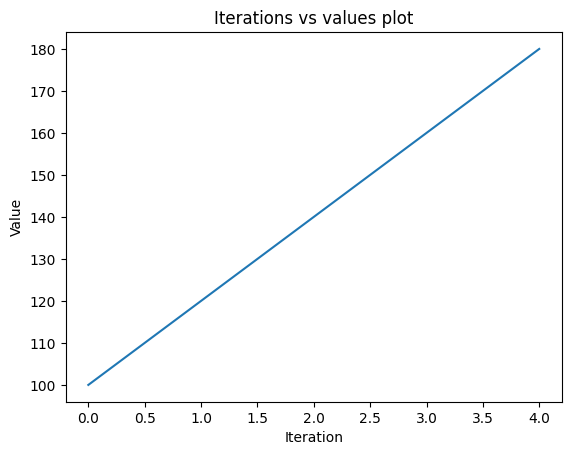

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

The approximate root is:  -1.130859375


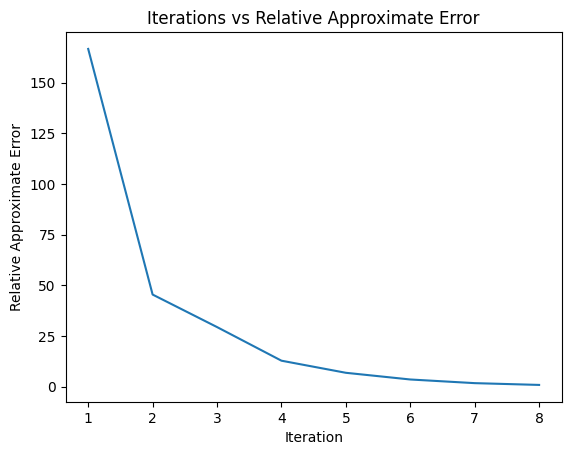

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def bisection_method_with_error(f, xl, xu, epsilon, iterations):
    if f(xl) * f(xu) > 0:
        print("No root found.")

    errors = []  #relative approximate errors
    x_prev = None

    for i in range(iterations):
        x_root = (xl + xu) / 2

        if x_prev is not None:
            relative_error = abs((x_root - x_prev) / x_root) * 100
            errors.append(relative_error)

        if abs(f(x_root)) < epsilon:
            break

        if f(xl) * f(x_root) < 0:
            xu = x_root
        else:
            xl = x_root

        x_prev = x_root

    return x_root, errors


def f(x):
     return x**3 - 2*x**2 + 4


root, errors = bisection_method_with_error(f, -2, 3, 0.005, 100)
print("The approximate root is: ",root)


plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Relative Approximate Error')
plt.title('Iterations vs Relative Approximate Error')
plt.show()


Your plot should look something like this,
<br>
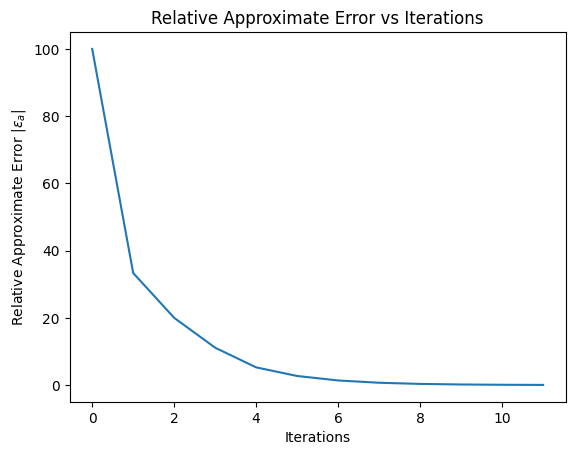

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_m)$ along the $Y$-axis.

The approximate root is:  -1.130859375


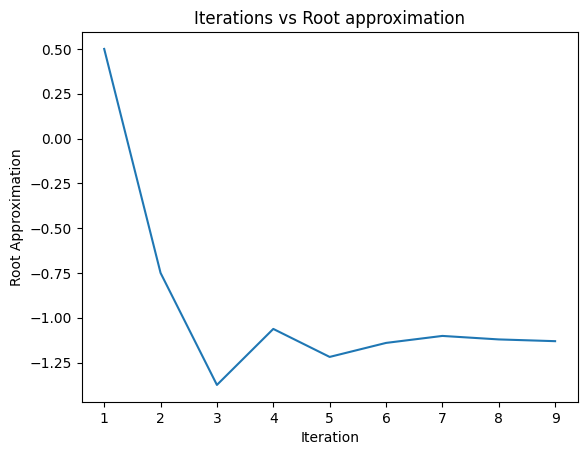

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def bisection_method_with_approx(f, xl, xu, epsilon, iterations):
    if f(xl) * f(xu) > 0:
        print("No root found.")

    approx = []  ##root approximation
    x_prev = None

    for i in range(iterations):
        x_root = (xl + xu) / 2
        approx.append(x_root)

        if x_prev is not None:
            relative_error = abs((x_root - x_prev) / x_root) * 100


        if abs(f(x_root)) < epsilon:
            break

        if f(xl) * f(x_root) < 0:
            xu = x_root
        else:
            xl = x_root

        x_prev = x_root

    return x_root, approx


def f(x):
     return x**3 - 2*x**2 + 4


root, approx = bisection_method_with_approx(f, -2, 3, 0.005, 100)
print("The approximate root is: ",root)


plt.plot(range(1, len(approx) + 1), approx)
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Iterations vs Root approximation')
plt.show()
